In [7]:
%reload_ext autoreload
%autoreload 2

In [8]:
import numpy as np
# import matplotlib
# matplotlib.use('qtagg')
import matplotlib.pyplot as plt
# plt.ion()

from pytrans.analysis.mode_solver import HarmonicTrap
from pytrans.ions import Ca40
from pytrans.plotting import plotting as pp

from pytrans.analysis import analyse_potential

--------------
Trap potential analysis for ion Ca40: 
Equilibrium position [um]
[ 3.6456 -1.987  -3.1232]
Gradient [V/m]
[0. 0. 0.]
Displacement at 1 MHz [um]
[0. 0. 0.]
Hessian [V/m2]
[[ 1.6351e+07  3.0000e+07  0.0000e+00]
 [ 3.0000e+07  1.0220e+08 -3.0000e+07]
 [ 0.0000e+00 -3.0000e+07  1.4716e+08]]
Normal mode frequencies [MHz]
[0.620548 2.42222 3.16193]
Eigenvectors
[[-0.946 0.317 0.0675]
 [-0.309 -0.821 -0.481]
 [-0.097 -0.476 0.874]]
Tilt angle of mode 2 (3.16): 118.54°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40, Ca40, Ca40]: 
Equilibrium positions [um]
[[-4.6697  0.7999 -2.5292]
 [ 1.0129 -1.1043 -2.9353]
 [ 6.271  -2.8668 -3.3105]
 [11.954  -4.7718 -3.7162]]
Normal modes
  Freq [MHz]                Ca40                          Ca40                          Ca40                          Ca40
------------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------  --------
      0.6205  -0.473     0.1585    

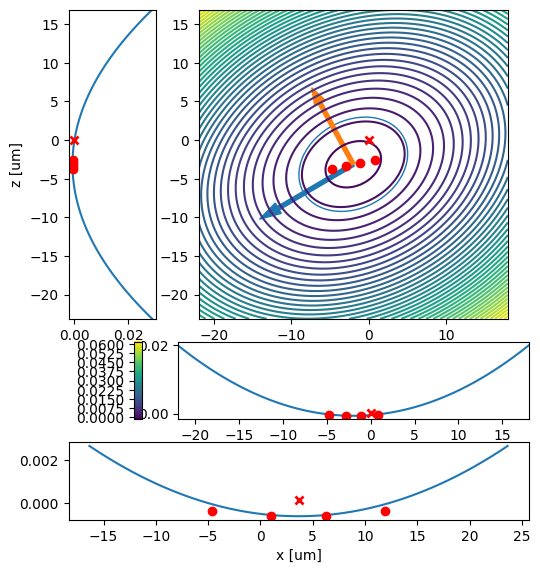

In [25]:
trap = HarmonicTrap(fx=1e6, fy=2.5e6, fz=3e6, ion=Ca40, stray_field=[0, 0, 400])
trap._H_dc[1, 2] = trap._H_dc[2, 1] = -3e7
trap._H_dc[0, 1] = trap._H_dc[1, 0] = 3e7

voltages = None
r0 = np.random.randn(3) * 1e-8

res = analyse_potential(trap, voltages, ions=[Ca40] * 4, ion1=Ca40, r0=r0, verbose=False, roi=(20e-6, 20e-6, 20e-6))
res


In [11]:
from models.surface_trap import SurfaceTrap

--------------
Trap potential analysis for ion Average[Ca40, Ca40]: 
Equilibrium position [um]
[-99.9976  -0.0003  67.0809]
Gradient [V/m]
[-0.3366 -0.2669 -0.6622]
Displacement at 1 MHz [um]
[-0.0206 -0.0163 -0.0405]
Hessian [V/m2]
[[ 1.6351e+07 -1.3174e+05  8.0098e+05]
 [-1.3174e+05  6.4881e+08  8.0013e+07]
 [ 8.0098e+05  8.0013e+07  5.4387e+08]]
Normal mode frequencies [MHz]
[0.999957 5.53341 6.50553]
Eigenvectors
[[-1 -0.000408 0.00158]
 [-0.00158 0.475 -0.88]
 [0.000392 0.88 0.475]]
Tilt angle of mode 2 (6.51): 28.37°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40]: 
Equilibrium positions [um]
[[-102.7884   -0.001    67.0854]
 [ -97.1825    0.0013   67.0766]]
Normal modes
  Freq [MHz]                    Ca40                                Ca40
------------  ----------  ----------  ----------  ----------  ----------  ---------
      0.9996   0.7092      0.0001977  -0.0005458   0.705       0.0003755  -0.001692
      1.732    0.705       0.0001908  -0.0005239  -0.709

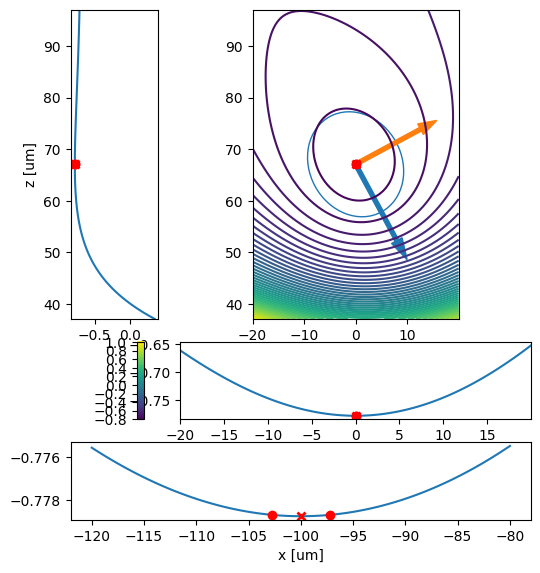

In [26]:
trap = SurfaceTrap()
voltages = np.load('transport\waveform.npy')[0]
r0 = np.asarray([trap.x_ele(2), 0, trap.z0]) + np.random.randn(3) * 1e-8

res = analyse_potential(trap, voltages, ions=[Ca40] * 2, r0=r0, verbose=False, roi=(20e-6, 20e-6, 30e-6))
res


In [ ]:
# plt.show()